In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('../Dataset/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,6543-CPZMK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Trying to figure out which are categorical, ordinal features and convert it 

In [6]:
#number of uniques in each feature
df_unique = df.nunique()
df_unique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
#Binary variables
binary_variable = list(df_unique[df_unique==2].index)
binary_variable

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [8]:
#categorical variables with multiple categories that is greater than 2 (binary)
categorical_variables = list(df_unique[(df_unique>2)&(df_unique <=6)].index)
df[categorical_variables].nunique()

MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaymentMethod       4
dtype: int64

# Preprocessing strings into numerical

In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer

lb, le = LabelBinarizer(), LabelEncoder()

In [10]:
#transforming ordinal/categorical variables with multiple categoris 

for columns in categorical_variables:
    df[columns] = le.fit_transform(df[columns])

In [11]:
df[categorical_variables].astype('category').describe()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,4
top,0,1,0,0,0,0,0,0,0,2
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


In [12]:
#encoding binary variables
for columns in binary_variable:
    df[columns] = lb.fit_transform(df[columns])

In [13]:
df[binary_variable].astype('category').describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
count,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,2
top,1,0,0,0,1,1,0
freq,3555,5901,3641,4933,6361,4171,5174


In [14]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [15]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')

In [16]:
df.dtypes

customerID           object
gender                int32
SeniorCitizen         int32
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [17]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.median())

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
df.corrwith(df.Churn).sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
dtype: float64

(20, 0)

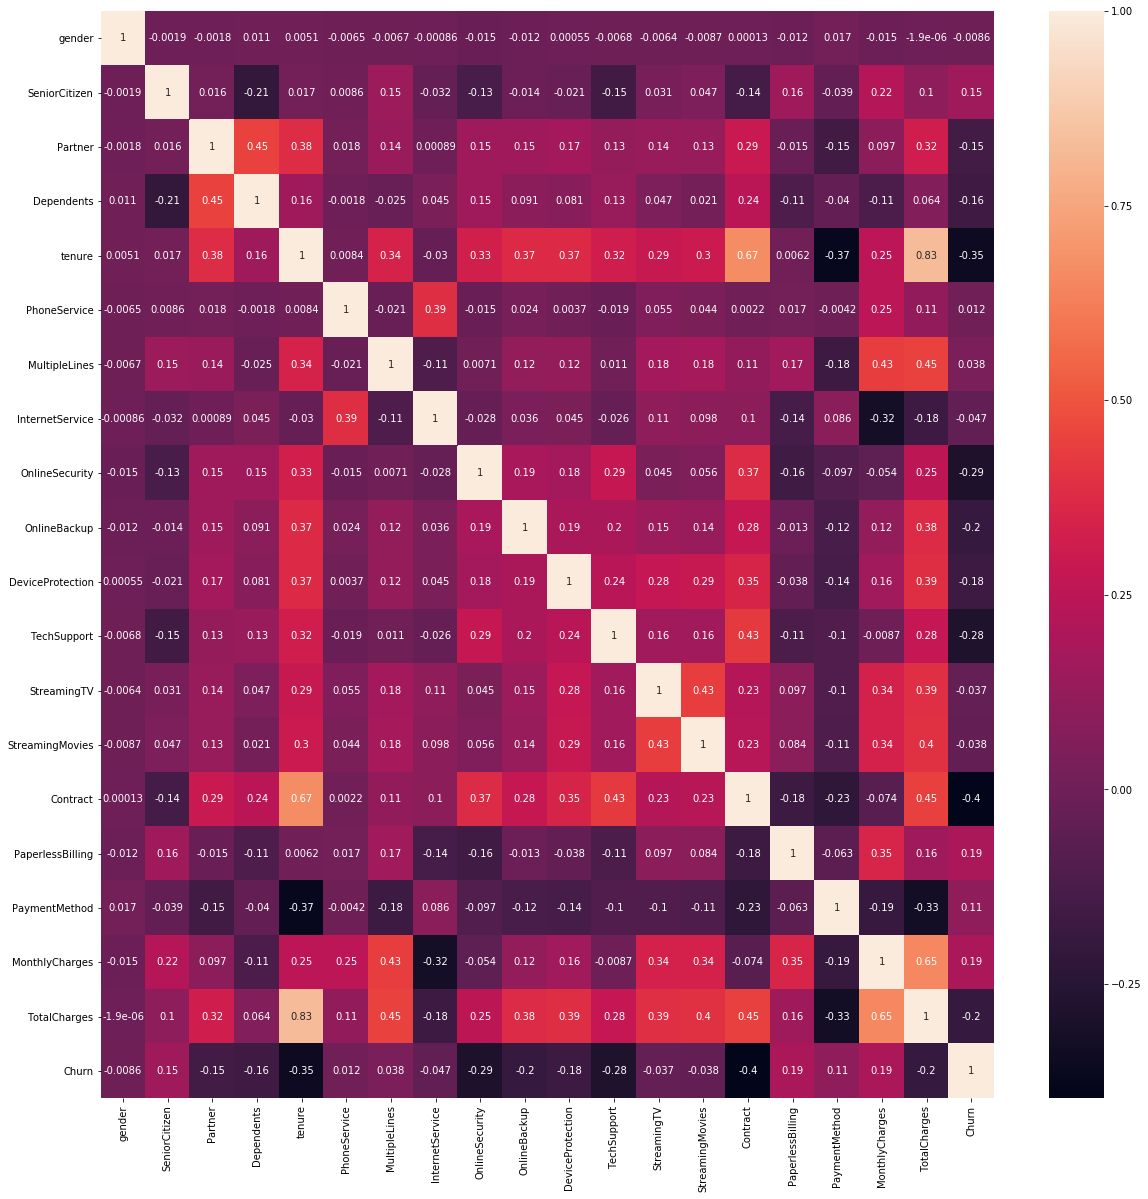

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.ylim(20,0)

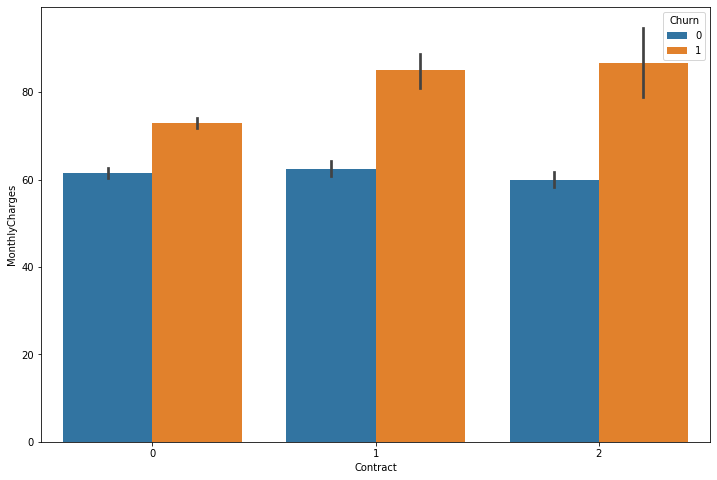

In [23]:
plt.figure(figsize=(12,8))
ax = sns.barplot( x='Contract',
    y='MonthlyCharges',
    hue='Churn',
    data=df );


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate

X = df.iloc[:, 1:-1]
y = df.iloc[:,-1]

In [25]:
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [26]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_validate

scaler= MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True, stratify=y)
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# With Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [ 0.5, 0.2, 0.1, 0.01, 0.001], 
              'subsample':[1.0, 0.5,0.2], 
              'max_features':[4, 5, 10, 12, 19],
              'n_estimators':[15, 20, 30, 40, 80, 100, 200, 400]
             }

GB = GridSearchCV(GradientBoostingClassifier(random_state=142), param_grid=parameters, scoring='accuracy', n_jobs=-1)
GB = GB.fit(X_train, y_train)
y_predGB = GB.predict(X_test)

In [29]:
GB.best_params_

{'learning_rate': 0.1,
 'max_features': 5,
 'n_estimators': 400,
 'subsample': 1.0}

In [30]:
GB.best_estimator_

GradientBoostingClassifier(max_features=5, n_estimators=400, random_state=142)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1708
           1       0.82      0.86      0.84      1707

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.84      3415
weighted avg       0.84      0.84      0.84      3415



# With Adaboost

In [32]:
parameters = {'learning_rate': [ 0.5, 0.2, 0.1, 0.01, 0.001], 
              #'subsample':[1.0, 0.5,0.2], 
              #'max_features':[4, 5, 10, 12, 19],
              'n_estimators':[15, 20, 30, 40, 80, 100, 200, 400]
             }

AB = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, scoring='accuracy', n_jobs=-1)
AB = AB.fit(X_train,y_train)
y_predAB = AB.predict(X_test)

In [33]:
GB.best_params_

{'learning_rate': 0.1,
 'max_features': 5,
 'n_estimators': 400,
 'subsample': 1.0}

In [34]:
GB.best_estimator_

GradientBoostingClassifier(max_features=5, n_estimators=400, random_state=142)

In [35]:
print(classification_report(y_test,y_predAB))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1708
           1       0.80      0.87      0.84      1707

    accuracy                           0.83      3415
   macro avg       0.83      0.83      0.83      3415
weighted avg       0.83      0.83      0.83      3415



# With Logistic Regression penalty L2

In [36]:
from sklearn.linear_model import LogisticRegression

L2 = LogisticRegression(penalty='l2',solver='saga', max_iter=700)
L2 = L2.fit(X_train,y_train)

y_predl2 = L2.predict(X_test)

In [37]:
print(classification_report(y_test,y_predl2))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1708
           1       0.78      0.85      0.81      1707

    accuracy                           0.81      3415
   macro avg       0.81      0.81      0.81      3415
weighted avg       0.81      0.81      0.81      3415



# With Decision Tree and Feature Importance 

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier().fit(X_train,y_train)

In [39]:
params_grid = {'max_depth':range(1, DT.tree_.max_depth+1, 2),
               'max_features':range(1,len(DT.feature_importances_)+1)
              }

DT_GV = GridSearchCV(DecisionTreeClassifier(random_state=101),
                   param_grid=params_grid,
                   scoring='accuracy',
                   n_jobs=-1)

DT_GV = DT_GV.fit(X_train,y_train)
y_predDT = DT_GV.predict(X_test)

In [40]:
print(classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1708
           1       0.79      0.87      0.83      1707

    accuracy                           0.82      3415
   macro avg       0.82      0.82      0.82      3415
weighted avg       0.82      0.82      0.82      3415



In [41]:
DT_GV.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=11, random_state=101)

In [42]:
DT_GV.best_params_

{'max_depth': 7, 'max_features': 11}

[Text(0, 0.5, 'Relative_Importance')]

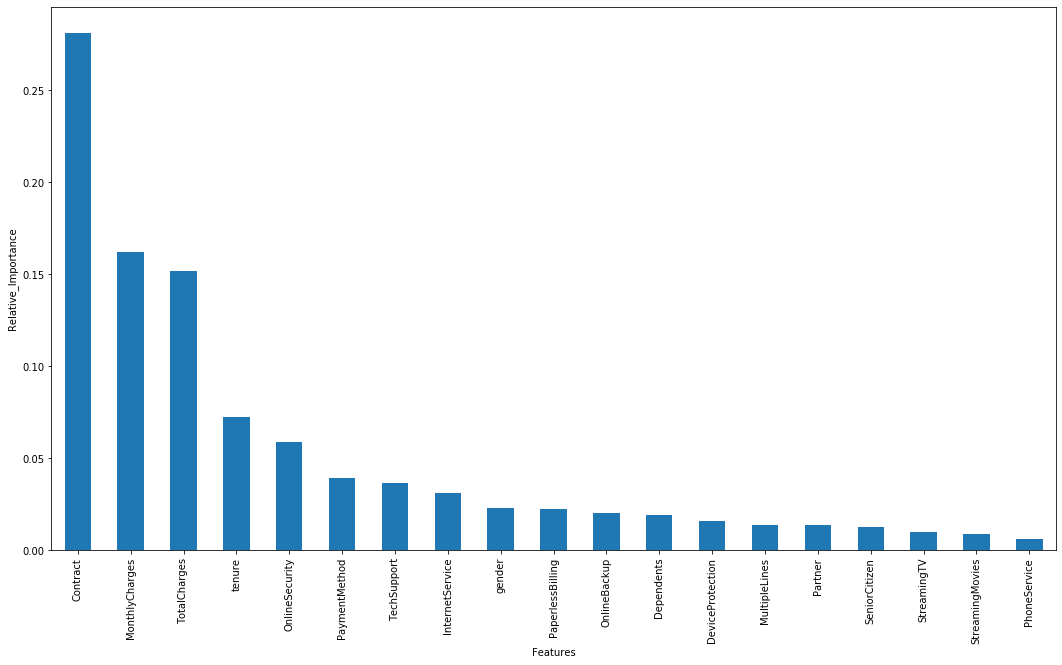

In [43]:
Feature_importance = pd.Series(DT.feature_importances_, index=[x for x in X]).sort_values(ascending=False)
bar = Feature_importance.plot(kind='bar', figsize=(18,10))
bar.set(xlabel='Features')
bar.set(ylabel='Relative_Importance')

In [44]:
Feature_importance

Contract            0.281404
MonthlyCharges      0.162058
TotalCharges        0.151847
tenure              0.072330
OnlineSecurity      0.059022
PaymentMethod       0.039096
TechSupport         0.036557
InternetService     0.031352
gender              0.022918
PaperlessBilling    0.022716
OnlineBackup        0.020197
Dependents          0.019194
DeviceProtection    0.016079
MultipleLines       0.013741
Partner             0.013671
SeniorCitizen       0.012709
StreamingTV         0.009949
StreamingMovies     0.009076
PhoneService        0.006083
dtype: float64

# Stacking all these up with Voting classifier for final prediction

In [45]:
from sklearn.ensemble import VotingClassifier

classifiers = [('GB', GB),('AB', AB), ('L2', L2), ('DT_GV', DT_GV) ]

VC = VotingClassifier(classifiers,voting='soft')

VC = VC.fit(X_train,y_train)
y_predvc = VC.predict(X_test)

In [46]:
print(classification_report(y_test,y_predvc))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1708
           1       0.81      0.88      0.84      1707

    accuracy                           0.83      3415
   macro avg       0.84      0.83      0.83      3415
weighted avg       0.84      0.83      0.83      3415



In [61]:
cm = confusion_matrix(y_test,y_predvc)

(2, 0)

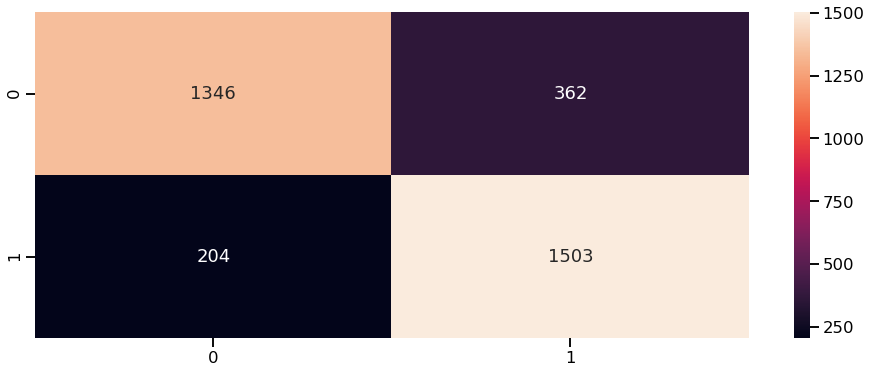

In [66]:
plt.figure(figsize=(16,6))
sns.set_context("talk")
#sns.heatmap(cm/np.sum(cm),annot=True, cmap='coolwarm',fmt='.2%')
sns.heatmap(cm,annot=True,fmt='d')
plt.ylim(2,0)

In [50]:
import pickle 
pickle.dump(VC, open('VC_CustomerChurn.p','wb'))

# Thank you!! My first contribution to Kaggle